# Load previously cleaned and merged properties (comps)

The file being imported below was constructed in the last seven exploratory notebooks (1.0 to 1.6). These data have been cleaned and merged so we can start the exploratory data analysis.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import pickle

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from src.definitions import ROOT_DIR
from src.data.utils import Table, save_pickle

In [3]:
plt.style.use('seaborn-poster')

In [4]:
comps_fn = ROOT_DIR / 'data/interim/2016/comps.pickle'
assert comps_fn.exists()

with open(comps_fn, 'rb') as f:
    comps = pickle.load(f)

In [5]:
comps.shape

(957686, 83)

In [6]:
comps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 957686 entries, 0 to 957685
Data columns (total 83 columns):
 #   Column                                          Non-Null Count   Dtype         
---  ------                                          --------------   -----         
 0   acct                                            957686 non-null  uint64        
 1   dscr                                            957686 non-null  category      
 2   date_erected                                    957686 non-null  uint16        
 3   yr_remodel                                      86406 non-null   float64       
 4   im_sq_ft                                        957683 non-null  float64       
 5   act_ar                                          957686 non-null  uint16        
 6   heat_ar                                         957682 non-null  float64       
 7   gross_ar                                        957686 non-null  uint16        
 8   eff_ar                            

In [7]:
comps.sample(10)

,acct,dscr,date_erected,yr_remodel,im_sq_ft,act_ar,heat_ar,gross_ar,eff_ar,perimeter,...,one_story_mas_pri,open_frame_porch_pri,open_mas_porch_pri,cond_desir_util,cost_and_design,exterior_wall,foundation_type,grade_adjustment,heating_ac,physical_condition
372658,1035010000013,Average,1972,NaN,1125.0,1871,1125.0,1871,1444.0,180.0,...,0.0,0.0,0.0,Average,NaN,Brick / Veneer,Slab,C,Central Heat/AC,Average
343898,1000190000001,Average,1967,NaN,1876.0,2028,1876.0,2028,1926.0,208.0,...,0.0,92.0,0.0,Average,NaN,Brick / Veneer,Slab,C,Central Heat/AC,Average
885576,1283030010025,Good,2009,NaN,3933.0,4524,3933.0,4524,3960.0,480.0,...,0.0,0.0,192.0,Average,NaN,Brick / Masonry,Slab,B,Central Heat/AC,Average
899433,1290510010009,Average,2007,NaN,1916.0,2419,1916.0,2419,2100.0,246.0,...,0.0,0.0,143.0,Average,NaN,Brick / Veneer,Slab,C+,Central Heat/AC,Average
11541,180800000003,Low,1950,NaN,1266.0,1938,1266.0,1938,1488.0,164.0,...,0.0,300.0,0.0,Average,NaN,Frame / Concrete Blk,Crawl Space,D,None,Average
680467,1185240020011,Average,1996,NaN,2196.0,2850,2196.0,2850,2434.0,248.0,...,0.0,0.0,182.0,Average,NaN,Brick / Veneer,Slab,C+,Central Heat/AC,Average
871771,1279100020028,Average,2007,NaN,1424.0,1920,1424.0,1920,1609.0,188.0,...,0.0,0.0,56.0,Average,NaN,Brick / Masonry,Slab,C,Central Heat/AC,Average
2938,102200000403,Average,2000,NaN,1573.0,2068,1573.0,2068,1760.0,272.0,...,0.0,0.0,35.0,Average,New / Rebuilt,Frame / Concrete Blk,Slab,C,Central Heat/AC,Average
619000,1157960040001,Average,1993,NaN,2679.0,3268,2679.0,3268,2740.0,332.0,...,0.0,170.0,20.0,Average,NaN,Brick / Masonry,Slab,C+,Central Heat/AC,Average
552606,1145050090008,Average,1981,NaN,1483.0,1946,1483.0,1946,1659.0,182.0,...,0.0,0.0,0.0,Average,NaN,Brick / Veneer,Slab,C,Central Heat/AC,Average


## Drop account numbers
The account numbers are kept as a reference to the raw data, but should not be used in the EDA. Since they are unique, let's use them as index in the comps dataframe.

In [8]:
comps['acct'].is_unique

True

In [9]:
comps.set_index('acct', inplace=True)

In [10]:
comps.sample(10)

,dscr,date_erected,yr_remodel,im_sq_ft,act_ar,heat_ar,gross_ar,eff_ar,perimeter,fireplace_masonry_firebrick,...,one_story_mas_pri,open_frame_porch_pri,open_mas_porch_pri,cond_desir_util,cost_and_design,exterior_wall,foundation_type,grade_adjustment,heating_ac,physical_condition
acct,,,,,,,,,,,,,,,,,,,,,
1144740180647,Average,1983,NaN,2438.0,3115,2438.0,3115,2689.0,298.0,1.0,...,0.0,75.0,0.0,Average,NaN,Brick / Veneer,Slab,C,Central Heat/AC,Average
1143460030042,Average,1981,NaN,1656.0,1656,1656.0,1656,1656.0,206.0,0.0,...,0.0,0.0,0.0,Good,NaN,Brick / Masonry,Slab,C+,Central Heat/AC,Average
1245860020010,Good,2006,NaN,3102.0,3816,3102.0,3816,3363.0,294.0,0.0,...,0.0,0.0,215.0,Average,NaN,Brick / Veneer,Slab,B-,Central Heat/AC,Average
1190980010015,Average,1999,NaN,2078.0,2572,2078.0,2572,2141.0,312.0,0.0,...,0.0,0.0,54.0,Fair,NaN,Frame / Concrete Blk,Slab,C,Central Heat/AC,Average
1184120080005,Average,1998,NaN,2098.0,2868,2098.0,2868,2320.0,228.0,0.0,...,0.0,0.0,0.0,Average,NaN,Brick / Veneer,Slab,C+,Central Heat/AC,Average
810460000024,Average,1954,NaN,1249.0,1301,1249.0,1301,1266.0,152.0,0.0,...,0.0,52.0,0.0,Average,NaN,Aluminum / Vinyl,Slab,C-,Central Heat,Average
1002690000019,Good,1969,2014.0,2888.0,3267,2888.0,3267,2898.0,334.0,1.0,...,432.0,271.0,0.0,Average,Total,Brick / Veneer,Slab,B,Central Heat/AC,Good
1151550020003,Low,1987,NaN,1320.0,1584,1320.0,1584,1407.0,148.0,0.0,...,0.0,264.0,0.0,Fair,NaN,Frame / Concrete Blk,Crawl Space,D,None,Average
1185390040007,Good,2005,NaN,4170.0,6795,4170.0,6795,4844.0,467.0,0.0,...,0.0,0.0,87.0,Average,NaN,Brick / Veneer,Slab,B+,Central Heat/AC,Average


# Build target column
The purpose of this work is to find if a given property was fairly appraised when compared with with similar properties.

For this we could find the distribution of similar properties total appraised value (`tot_appr_val`) and locate where our target house falls. However, since there is a wide range of property values given their location (neighborhood), physical condition, renovation, and other factors, it might be best to focus on the year-to-year percent change in property value:

`yy_pct_change` = (`tot_appr_val` - `prior_tot_appr_val`) / `prior_tot_appr_val`

## Drop NaNs in value colums

In [11]:
cond0 = comps['prior_tot_appr_val'].isna()
cond1 = comps['tot_appr_val'].isna()

In [12]:
print(f'Percent of prior_tot_appr_val missing values: {cond0.sum() / cond0.shape[0]}')
print(f'Percent of tot_appr_val missing values: {cond1.sum() / cond1.shape[0]}')

Percent of prior_tot_appr_val missing values: 0.0017396098512456066
Percent of tot_appr_val missing values: 4.176734336724146e-06


In [13]:
comps = comps.loc[~cond0 & ~cond1, :]

## Drop samples where prior_tot_appr_val is zero

In [14]:
cond0 = comps['prior_tot_appr_val'] == 0

cond0.sum()

30

In [15]:
comps = comps.loc[~cond0, :]

## Check tot_appr_val

In [16]:
from src.visualization.visualize import plot_ecdf, plot_counts, plot_hist

In [17]:
col ='tot_appr_val'
series = comps[col]

In [18]:
series.describe()

count    9.559880e+05
mean     2.191061e+05
std      2.800815e+05
min      1.000000e+02
25%      1.000000e+05
50%      1.501055e+05
75%      2.342272e+05
max      1.726682e+07
Name: tot_appr_val, dtype: float64

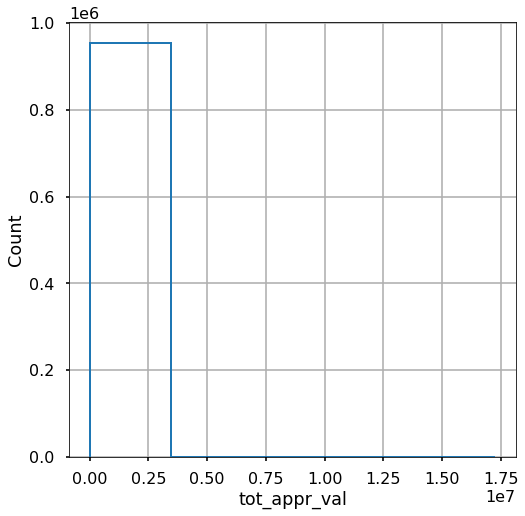

In [19]:
plot_hist(series, col)

The high valued properties are masking the distribution of the lower valued properties in this histogram. Let's remake this figure with only properties valued less than $500k.

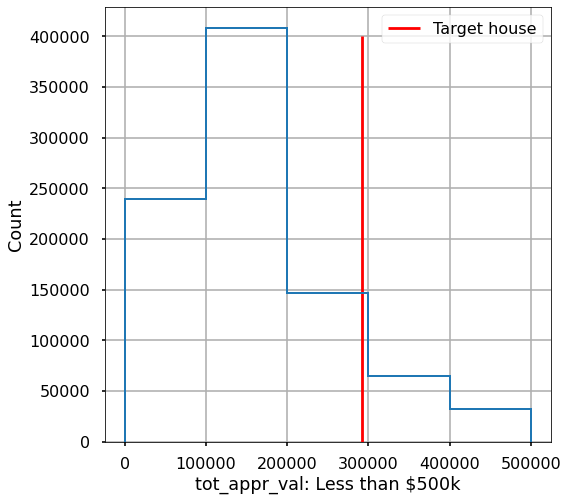

In [20]:
plot_hist(series[series < 500000], col + ': Less than $500k')
_ = plt.vlines(292707, 0, 400_000, color='red', label='Target house')
_ = plt.legend(loc='upper right')

The target house is on the high tail of the distribution of all single-family houses in HCAD. Perhaps we can remove the effect of the property's appraisal value magnitude by calculating the year-to-year percent change in value.

## Build year-to-year percent change value

In [21]:
comps['yy_pct_change'] = (comps['tot_appr_val'] - comps['prior_tot_appr_val']) / comps['prior_tot_appr_val']

In [22]:
comps['yy_pct_change'].describe()

count    955988.000000
mean          0.165985
std           8.581099
min          -0.870447
25%           0.030658
50%           0.099989
75%           0.099999
max        7151.941176
Name: yy_pct_change, dtype: float64

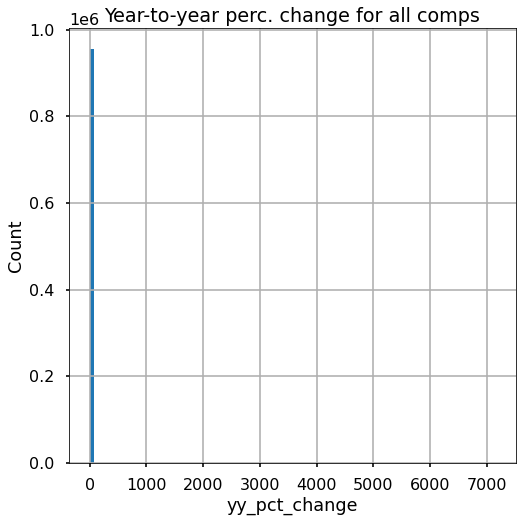

In [23]:
_ = plt.figure(figsize=(8,8))
_ = comps['yy_pct_change'].hist(bins=100)
_ = plt.title('Year-to-year perc. change for all comps')
_ = plt.xlabel('yy_pct_change')
_ = plt.ylabel('Count')

In [24]:
comps['yy_pct_change'].describe()

count    955988.000000
mean          0.165985
std           8.581099
min          -0.870447
25%           0.030658
50%           0.099989
75%           0.099999
max        7151.941176
Name: yy_pct_change, dtype: float64

There are valid reasons for a property value appreciation from year-to-year to be multiples of the initial value, for example, when a new house is constructed on an existing lot, the previous year value will be the value of the land alone, and the current year value will be the value of the land plus the value of the improvement (built house).

Similarly, when the existing house in the prior year is a tear-down, we can expect the value of the property to increase significantly if the owner has removed the old house and built a new one on its place. This is fairly common on neighborhoods with new constructions restrictions, like The Heights.

Also, we can expect a large value increase if there has been a major remodeling that either increased the number of rooms or baths (fixtures), common on fixer-uppers, but this work generally increases the value of a property by a fraction, and not whole multipliers.

Finally, I think these large (7151%) appreciation values could be errors in the data, or properties that sold under the 10% cap benefits in very expensive neighborhoods. After the sale the cap no longer applies, and thus the property is assess to its true market value.

Let's zoom-in properties appreciated less than 100%.

In [25]:
comps_app_lt_1 = comps.loc[comps['yy_pct_change'] < 1, :].copy()

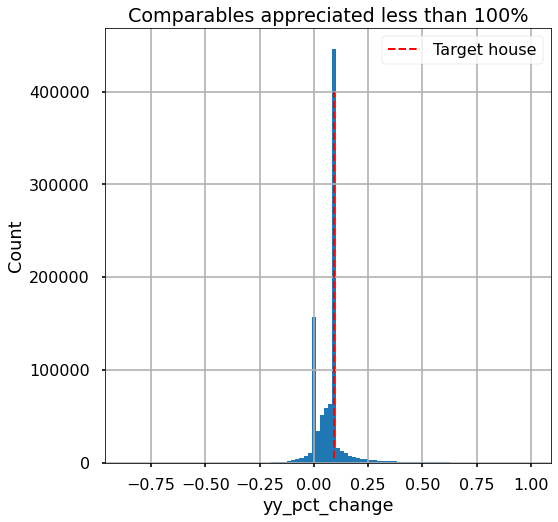

In [26]:
_ = plt.figure(figsize=(8,8))
_ = comps_app_lt_1['yy_pct_change'].hist(bins=100)
_ = plt.vlines(0.093, 5_000, 400_000, color='red', linestyle='--', linewidth=2, label='Target house')
_ = plt.title('Comparables appreciated less than 100%')
_ = plt.xlabel('yy_pct_change')
_ = plt.ylabel('Count')
_ = plt.legend(loc='upper right')

In [27]:
print(comps_app_lt_1['yy_pct_change'].value_counts(bins=100))
print(comps_app_lt_1['yy_pct_change'].value_counts(bins=100, normalize=True))

(0.0833, 0.102]       446146
(-0.0102, 0.00854]    157550
(0.0646, 0.0833]       63198
(0.0459, 0.0646]       59267
(0.0272, 0.0459]       51915
                       ...  
(-0.758, -0.74]            2
(-0.683, -0.665]           1
(-0.814, -0.796]           1
(-0.721, -0.702]           0
(-0.852, -0.833]           0
Name: yy_pct_change, Length: 100, dtype: int64
(0.0833, 0.102]       0.471955
(-0.0102, 0.00854]    0.166664
(0.0646, 0.0833]      0.066854
(0.0459, 0.0646]      0.062696
(0.0272, 0.0459]      0.054918
                        ...   
(-0.758, -0.74]       0.000002
(-0.683, -0.665]      0.000001
(-0.814, -0.796]      0.000001
(-0.721, -0.702]      0.000000
(-0.852, -0.833]      0.000000
Name: yy_pct_change, Length: 100, dtype: float64


This is interesting. There is a spike in the 10% value increase mark. This is possibly related to [Capped Appraisal Values](https://hcad.org/videos/the-10-homestead-cap/), where the appraisal district will cap the value of an existing property if the current year appraised value is more than 10% of last year's. Also, the property has to be homestead exempt for the current and prior year to be eligible for this benefit.

We can see in the histogram that about 445000 properties qualified for this capping rule. Neat!

There is a lesser spike near 0 % value increase, but its origin is less clear.

# Select the comparable properties

The histogram on year-to-tear percent change appraise value above shows that most properties appreciated up to 40%, and depreciated down to 25%. While this is insightful, the spread is too broad as it accounts for almost all properties in the district, with all sorts of conditions, year built, neighborhood, and many other variables, and as a result, the target house is well within this distribution.

Next, let's select the comparable properties to my property of interest by counting only properties in the same subdivision.

In [28]:
cond0 = comps['lgl_2'].str.contains('PARK AT KLEIN SEC 1', case=False, na=False, regex=False)

subdiv = comps.loc[cond0, :].copy()

In [29]:
subdiv.shape

(111, 83)

Since we have selected only the houses at the specified subdivision, there are a lot of categorical columns in this subset of samples that are single valued (e.g. `neighborhood_code`, `market_area_1_dscr`, etc.). Let's remove these columns.

In [30]:
for col in subdiv.columns:
    if len(subdiv[col].unique()) == 1:
        subdiv.drop(col,inplace=True,axis=1)

In [31]:
subdiv.shape

(111, 32)

## Drop target house from subdivision houses
The property of interest is included in the distribution of subdivision houses with the appraised value assigned by HCAD after I protested it. I think that including this sample in the training part of the model could give an unfair advantage and result in optimistic test errors. For this reason, I'll drop it here.

In [32]:
target_house = subdiv.loc[1347180010049, :]

In [33]:
target_house

date_erected                             2014
im_sq_ft                                 2697
act_ar                                   3351
heat_ar                                  2697
gross_ar                                 3351
eff_ar                                   2824
perimeter                                 430
fireplace_metal_prefab                      1
fixtures_addl                               2
fixtures_total                             15
room_bedroom                                4
room_full_bath                              3
room_half_bath                              1
room_rec                                    2
room_total                                  9
story_height_index                          2
bld_ar                                   2697
land_ar                                  6350
acreage                                0.1458
land_val                                36313
tot_appr_val                           263704
prior_land_val                    

In [34]:
subdiv.drop(1347180010049, inplace=True)

## Plot comparables distribution

The target house appraised value plotted here is what I received from HCAD (before protesting).

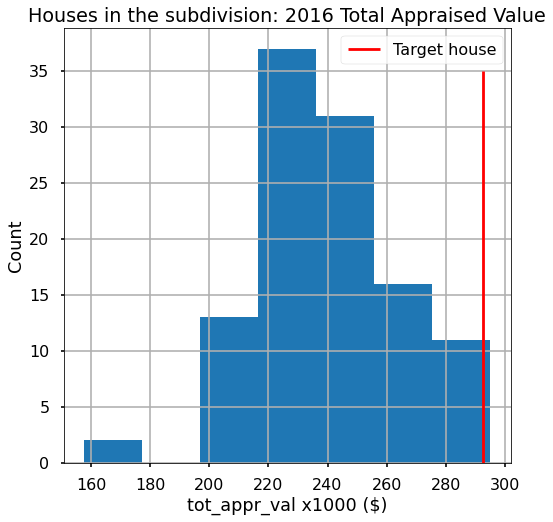

In [35]:
_ = plt.figure(figsize=(8,8))
_ = (subdiv['tot_appr_val']/1000).hist(bins=7)
_ = plt.title('Houses in the subdivision: 2016 Total Appraised Value')
_ = plt.vlines(292707/1000, 0, 35, color='red', label='Target house')
_ = plt.xlabel('tot_appr_val x1000 ($)')
_ = plt.ylabel('Count')
_ = plt.legend(loc='upper right')

## Find subdivision comparables
In the last figure, we can see that the target house sits on the high end of the distribution of appraised values for the houses in the subdivision. To make a fair comparison, we should find the properties with similar characteristics to the target property. Let's use an unsupervised learning method to find their grouping.

In [36]:
from sklearn.cluster import KMeans

In [37]:
subdiv.info()

<class 'pandas.core.frame.DataFrame'>
UInt64Index: 110 entries, 1347180010011 to 1347180030030
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date_erected            110 non-null    uint16        
 1   im_sq_ft                110 non-null    float64       
 2   act_ar                  110 non-null    uint16        
 3   heat_ar                 110 non-null    float64       
 4   gross_ar                110 non-null    uint16        
 5   eff_ar                  110 non-null    float64       
 6   perimeter               110 non-null    float64       
 7   fireplace_metal_prefab  110 non-null    float32       
 8   fixtures_addl           110 non-null    float32       
 9   fixtures_total          110 non-null    float32       
 10  room_bedroom            110 non-null    float32       
 11  room_full_bath          110 non-null    float32       
 12  room_half_bath          110

For K-Means to work in theory we should remove the non-numerical features. In addition, I'll remove the features that represent monetary value ($) in such way to build the grouping based only on the physical characteristics (areas, number of rooms, baths, half-baths...) of the properties. 

In [38]:
drop = [
    'yy_pct_change',
    'land_val',
    'tot_appr_val',
    'prior_land_val',
    'prior_tot_appr_val',
    'new_own_dt', # Latest purchase date
    'lgl_1', # House lot
    'exterior_wall'
]

In [39]:
subdiv_numeric = subdiv.drop(drop, axis=1)

In [40]:
ks = range(1, 21)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(subdiv_numeric)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

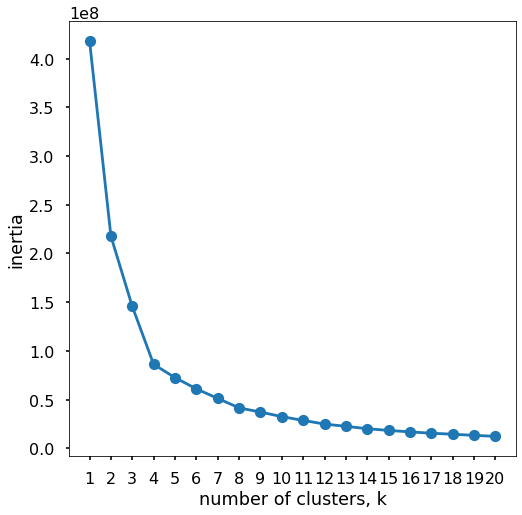

In [41]:
# Plot ks vs inertias
plt.figure(figsize=(8, 8))
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

It seems like 8 clusters is a good choice. However, after some trial and error I found that k > 3 makes for one cluster with almost all the samples, and a lot of clusters with very few (~3) samples. For this reason I chose k=3.

In [42]:
kmeans = KMeans(n_clusters=3, random_state=0)

In [43]:
kmeans.fit(subdiv_numeric)
labels = kmeans.predict(subdiv_numeric)

In [44]:
pd.DataFrame({'labels': labels}).value_counts()

labels
0         54
2         39
1         17
dtype: int64

## TSNE
Now let's plot the selected labels using TSNE to find if these groups overlap or are separated.

In [45]:
from sklearn.manifold import TSNE

In [46]:
model = TSNE(learning_rate=100)

In [47]:
transformed = model.fit_transform(subdiv_numeric)

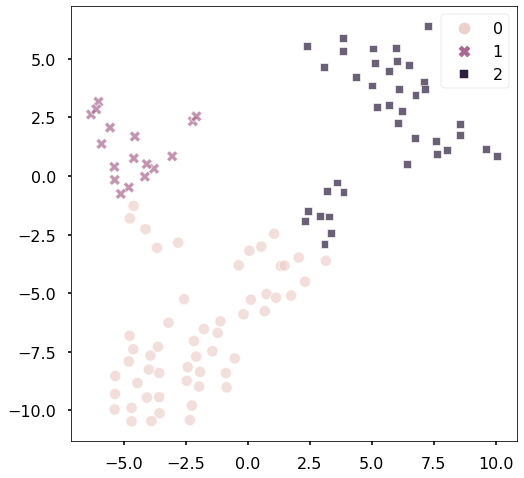

In [48]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=transformed[:, 0], y=transformed[:, 1], hue=labels, style=labels, alpha=0.7)
plt.show()

Excellent! They are well separated indicating that these groups are meaningful.

Now let's add the labels found with K-meands back to the features dataframe.

In [49]:
subdiv['kmeans_label'] = labels

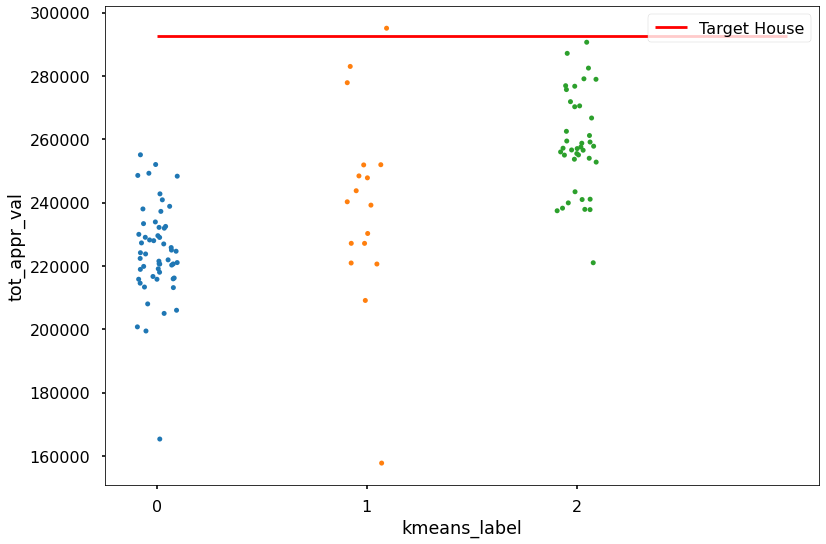

In [50]:
sns.stripplot(x='kmeans_label', y='tot_appr_val', data=subdiv)
plt.hlines(292707, 0, 3, colors='red', label='Target House')
plt.legend(loc='upper right')

If we plot the improvement area (`im_sq_ft`) vs. the total appraised value we can see that the k-means groups 0 and 2 represent houses with large area and value, and houses with low area and value, respectively.

<AxesSubplot:xlabel='im_sq_ft', ylabel='tot_appr_val'>

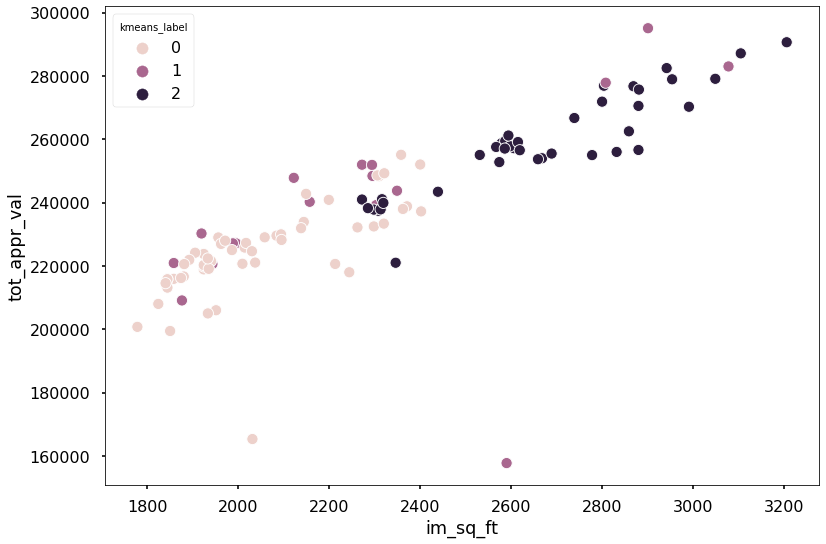

In [51]:
sns.scatterplot(x='im_sq_ft', y='tot_appr_val', data=subdiv, hue='kmeans_label')

## Subdivision comparables
Let's predict the target house kmeans cluster, so we can select the appropriate comparables.

In [52]:
target_house_numeric = target_house.drop(drop)

In [53]:
target_house_label = kmeans.predict(target_house_numeric.to_numpy().reshape(1, -1))[0]
print(f"The target house label is: {target_house_label}")

The target house label is: 2


In [54]:
subdiv_comps = subdiv.loc[subdiv['kmeans_label'] == target_house_label, :]

In [55]:
subdiv_comps.shape

(39, 33)

So there are 39 properties comparable to the house of interest. Let's use these houses to build the distribution of comparables.

# Null-hypothesis test

**Population**: Comparable houses appraised by HCAD in the PARK AT KLEIN SEC 1 subdivision.

**Significance level**: 5%

$H_0$: The 2016 appraised value for the target house was fair relative to its comparables.

$H_a$: The 2016 appraised value was unfair, or it doesn't belong to the comparables distribution.

In [56]:
pop_mean = subdiv_comps['tot_appr_val'].mean()
pop_std = subdiv_comps['tot_appr_val'].std(ddof=0)

print(f"The population mean is: ${pop_mean:.2f}")
print(f"The population standard deviation is: ${pop_std:.2f}")

The population mean is: $258729.44
The population standard deviation is: $15373.89


In [57]:
from scipy.stats import norm

In [58]:
zscore = (292707 - pop_mean) / pop_std

In [59]:
zscore

2.210081767245105

In [60]:
pvalue = 1 - norm.cdf(zscore)
print(f"The p-value is: {pvalue:.3f}")

The p-value is: 0.014


Since the p-value (0.014) is below the significance level (0.05) we can say there is reasonable statistical evidence to reject the the null hypothesis, and thus we have statistical evidence to say that the property appraisal was unfair relative to its comparables.

In other words, if the null hypothesis is true, there is a 1.4% probability of getting an appraised value as extreme as $292707 or lager. Since this 1.4\% is below the 5\% significance level (z=1.96), we reject the null hypothesis.  

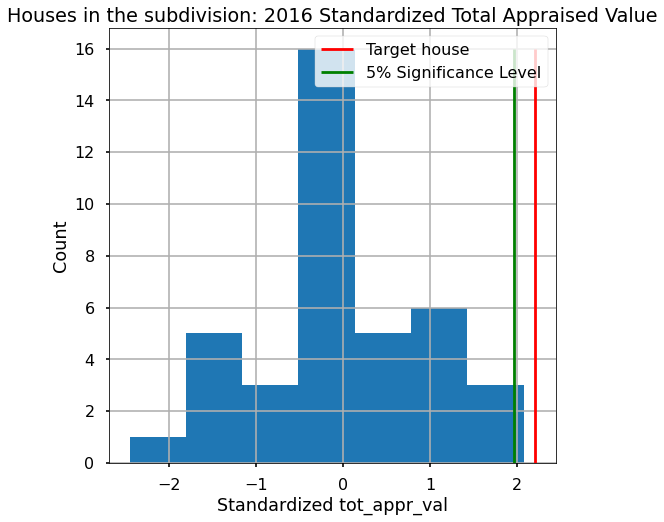

In [61]:
_ = plt.figure(figsize=(8,8))
_ = ((subdiv_comps['tot_appr_val'] - pop_mean)/pop_std).hist(bins=7)
_ = plt.title('Houses in the subdivision: 2016 Standardized Total Appraised Value')
_ = plt.vlines(zscore, 0, 16, color='red', label='Target house')
_ = plt.vlines(1.96, 0, 16, color='green', label='5% Significance Level')
_ = plt.xlabel('Standardized tot_appr_val')
_ = plt.ylabel('Count')
_ = plt.legend(loc='upper right')

Now that we have found that there is something wrong with the appraisal value of the target property, let's turn our attention to predicting what would have been a better value, based on the subdivision houses subset.

# Export subdivision data

In [62]:
save_fn = ROOT_DIR / 'data/interim/2016/subdiv.pickle'
save_pickle(subdiv, save_fn)

In [64]:
save_fn = ROOT_DIR / 'models/kmeans.pickle'
save_pickle(kmeans, save_fn)